<a href="https://colab.research.google.com/github/chamomatias/DBSCAN-Density-Based-Spatial-Clustering-of-Applications-with-Noise-/blob/main/241126_alg_dbscan_Ejercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <h2>Introducción</h2>
<p>En este ejercicio, se utilizaremos el algoritmo <strong>DBSCAN</strong> (Density-Based Spatial Clustering of Applications with Noise) para realizar una clasificación de un conjunto de datos sintéticos. DBSCAN es un algoritmo de <strong>agrupamiento</strong> que permite identificar clusters de puntos en un espacio multidimensional, a la vez que detecta puntos ruidosos o atípicos que no pertenecen a ningún grupo. A diferencia de otros algoritmos de clustering, como <em>K-means</em>, DBSCAN no requiere que se especifique el número de clusters, sino que los define en función de la densidad de los puntos.</p>

<h3>Objetivos</h3>
<ul>
    <li>Generar un conjunto de datos sintéticos con diferentes centros de clusters utilizando la función <strong>make_blobs</strong>.</li>
    <li>Aplicar el algoritmo DBSCAN para detectar clusters y puntos ruidosos en los datos generados.</li>
    <li>Analizar los resultados obtenidos, evaluando la cantidad de clusters identificados y el número de puntos ruidosos.</li>
    <li>Visualizar los resultados en un gráfico para facilitar la interpretación de los clusters y el ruido.</li>
</ul>


## Desarrollo:

### 1. Importamos las librerias necesarias

El código importa las bibliotecas necesarias para generar, analizar y visualizar datos con la técnica de clustering DBSCAN.

In [7]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

<ul>
<li>numpy es una biblioteca en Python utilizada para realizar cálculos numéricos de alto rendimiento, especialmente operaciones con arreglos y matrices. En este código, se utiliza para manipular datos y realizar cálculos como contar etiquetas únicas o identificar puntos de ruido.
<li>matplotlib.pyplot es un módulo de Matplotlib, una biblioteca para crear gráficos y visualizaciones en 2D. Aquí se utiliza para representar gráficamente los puntos generados y los resultados del clustering, como los clusters detectados y los puntos de ruido.
<li>make_blobs es una función de la biblioteca scikit-learn, usada para generar datos sintéticos con estructura en forma de grupos o "blobs". Permite crear un dataset controlado con clusters definidos, ideal para probar y visualizar algoritmos de clustering.
<li>from sklearn.cluster import DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) es un algoritmo de clustering basado en densidad.
<ul>
<li>Detecta regiones densamente pobladas como clusters y etiqueta los puntos que no pertenecen a ninguna región densa como ruido.
<li>Este método es útil para datos espaciales y cuando los clusters tienen formas arbitrarias.
</ul>
</ul>

### 2. Configuración de parámetros y datos

In [2]:
# Configuración de parámetros y datos
num_samples_total = 1000  # Total de puntos a generar
cluster_centers = [(3, 3), (7, 7)]  # Centros de los clusters
num_classes = len(cluster_centers)  # Número de clases (dimensiones de características)
epsilon = 1.0  # Radio máximo para considerar vecinos
min_samples = 13  # Número mínimo de puntos para formar un cluster

<p>Este bloque configura los parámetros iniciales y los datos necesarios para generar el dataset sintético y aplicar el algoritmo <strong>DBSCAN</strong>. A continuación, desgloso cada línea:</p>

<h3>1. <code>num_samples_total = 1000</code></h3>
<ul>
    <li><strong>Significado:</strong> Especifica el número total de puntos de datos que se generarán.</li>
    <li><strong>Uso:</strong> Determina el tamaño del dataset que será procesado. Aquí, se generarán 1.000 puntos distribuidos en clusters.</li>
</ul>

<h3>2. <code>cluster_centers = [(3, 3), (7, 7)]</code></h3>
<ul>
    <li><strong>Significado:</strong> Define las coordenadas de los centros de los clusters que se generarán.</li>
    <li><strong>Uso:</strong> Cada par de números representa un punto en el espacio (X, Y) que actuará como el centro alrededor del cual se distribuirán los puntos del cluster.
        <ul>
            <li>En este caso, habrá dos clusters: uno centrado en (3, 3) y otro en (7, 7).</li>
        </ul>
    </li>
</ul>

<h3>3. <code>num_classes = len(cluster_centers)</code></h3>
<ul>
    <li><strong>Significado:</strong> Calcula el número de clusters definidos en <code>cluster_centers</code>.</li>
    <li><strong>Uso:</strong> Se usa para determinar automáticamente cuántos clusters habrá. En este ejemplo, <code>num_classes</code> será igual a 2.</li>
</ul>

<h3>4. <code>epsilon = 1.0</code></h3>
<ul>
    <li><strong>Significado:</strong> Parámetro <code>eps</code> del algoritmo <strong>DBSCAN</strong>, que representa el radio máximo dentro del cual los puntos se consideran vecinos.</li>
    <li><strong>Uso:</strong> Determina qué tan cerca deben estar los puntos para ser agrupados como parte del mismo cluster. Un valor mayor considera más puntos como vecinos, formando clusters más grandes.</li>
</ul>

<h3>5. <code>min_samples = 13</code></h3>
<ul>
    <li><strong>Significado:</strong> Parámetro <code>min_samples</code> de <strong>DBSCAN</strong>, que especifica el número mínimo de puntos (incluido el punto central) necesarios para formar un cluster.</li>
    <li><strong>Uso:</strong> Un cluster se define solo si al menos 13 puntos están dentro del radio <code>epsilon</code> desde un punto central. Si un punto no cumple esta condición, puede ser clasificado como ruido o "outlier".</li>
</ul>

<h3>Propósito de esta configuración:</h3>
<ul>
    <li><strong>Control del dataset:</strong> Estas variables definen la estructura de los datos generados.</li>
    <li><strong>Parámetros del algoritmo:</strong> Los valores de <code>epsilon</code> y <code>min_samples</code> son clave para ajustar cómo <strong>DBSCAN</strong> detectará clusters y manejará puntos ruidosos.</li>
</ul>

<p>Con estas configuraciones, se genera un dataset adecuado para probar el comportamiento del algoritmo y visualizar los resultados de clustering.</p>


### 3. Generación de datos sintéticos

In [12]:
# Generación de datos sintéticos
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=cluster_centers,
    n_features= num_classes,  # Número de características por punto
    center_box=(0, 1),
    cluster_std=0.5  # Desviación estándar de los clusters
)

<p>El código utiliza la función <code>make_blobs</code> de <code>sklearn.datasets</code> para crear un conjunto de datos sintéticos, ideal para tareas de <em>clustering</em>.</p>

<ul>
  <li><strong>n_samples=num_samples_total</strong>: Define el número total de puntos a generar.</li>
  <li><strong>centers=cluster_centers</strong>: Especifica los centros de los clusters. En este caso, hay dos clusters en <code>(3, 3)</code> y <code>(7, 7)</code>.</li>
  <li><strong>n_features=num_classes</strong>: Establece el número de características (dimensiones) por punto de datos. En este caso, es igual al número de clusters (2).</li>
  <li><strong>center_box=(0, 1)</strong>: Define el rango en el que se generan los centros de los clusters.</li>
  <li><strong>cluster_std=0.5</strong>: Establece la desviación estándar de los clusters, controlando su dispersión.</li>
</ul>

<p><strong>Datos sintéticos:</strong> Son datos generados artificialmente, en lugar de datos reales. Se utilizan para probar algoritmos de machine learning, como en este caso, DBSCAN.</p>


### 4. Aplicación de DBSCAN

In [13]:
# Aplicación de DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)
labels = db.labels_  # Etiquetas asignadas a cada punto

<p>En este paso, se aplica el algoritmo DBSCAN a los datos generados previamente con la función <code>fit(X)</code>, que ajusta el modelo de clustering a los puntos de datos <code>X</code>.</p>

<ul>
  <li><strong>DBSCAN(eps=epsilon, min_samples=min_samples)</strong>: Se crea una instancia del modelo DBSCAN, con los siguientes parámetros:</li>
  <ul>
    <li><code>eps=epsilon</code>: Especifica el radio máximo para considerar dos puntos como vecinos cercanos. Si la distancia entre los puntos es menor que este valor, se agrupan en el mismo cluster.</li>
    <li><code>min_samples=min_samples</code>: Define el número mínimo de puntos que se deben agrupar para formar un cluster.</li>
  </ul>
  <li><strong>db.labels_</strong>: Después de ajustar el modelo a los datos, se extraen las etiquetas asignadas a cada punto. Estas etiquetas indican a qué cluster pertenece cada punto, o si es considerado ruido (<code>-1</code> para los puntos de ruido).</li>
</ul>

<p>DBSCAN es un algoritmo de <strong>clustering</strong> basado en densidad que permite identificar clusters de forma flexible, sin requerir que el número de clusters sea predefinido.</p>


###5. Análisis de resultados

In [14]:
# Análisis de resultados
no_clusters = len(np.unique(labels[labels >= 0]))  # Cantidad de clusters, ignorando ruido
no_noise = np.sum(labels == -1)  # Cantidad de puntos clasificados como ruido

print(f'Número de clusters estimados: {no_clusters}')
print(f'Número de puntos ruidosos: {no_noise}')

Número de clusters estimados: 2
Número de puntos ruidosos: 0


<h3>Análisis de resultados</h3>
<p>Este bloque de código realiza el análisis de los resultados obtenidos del modelo DBSCAN.</p>

<ul>
  <li><strong>no_clusters = len(np.unique(labels[labels >= 0]))</strong>: Se calcula el número de clusters estimados, ignorando los puntos de ruido. <code>np.unique(labels)</code> devuelve los valores únicos de las etiquetas, y se filtra para considerar solo aquellos que son mayores o iguales a 0, es decir, los clusters. La longitud de este conjunto da el número de clusters.</li>
  <li><strong>no_noise = np.sum(labels == -1)</strong>: Se calcula el número de puntos clasificados como ruido. <code>labels == -1</code> devuelve una matriz booleana donde los puntos de ruido son identificados con el valor <code>-1</code>, y <code>np.sum()</code> cuenta cuántos de esos puntos existen.</li>
</ul>

<p>Finalmente, se imprime el número de clusters estimados y la cantidad de puntos ruidosos detectados.</p>


###6. Visualización de resultados

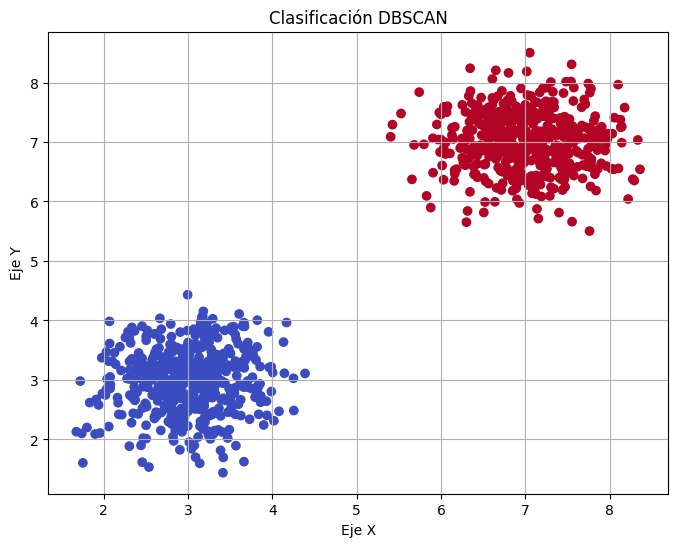

In [16]:
# Visualización de resultados
# Asignar colores según etiquetas (ruido en rojo, clusters en azul)
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))
#colors = ['#b40426' if label == -1 else '#3b4cc0' for label in labels]

plt.figure(figsize=(8, 6))

plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
#plt.scatter(X[:, 0], X[:, 1], c=colors, marker="o", edgecolor="k", s=50)

plt.title('Clasificación DBSCAN')
plt.xlabel('Eje X')
plt.ylabel('Eje Y')
plt.grid(True)
plt.show()

<p>Este bloque de código genera una visualización de los datos generados y clasificados por el modelo DBSCAN.</p>

<ul>
  <li><strong>colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426', labels))</strong>: Se asignan colores a los puntos según las etiquetas generadas por DBSCAN. Se utiliza la función <code>map</code> para iterar sobre cada etiqueta <code>x</code> en <code>labels</code>. Si la etiqueta es 1 (indicando un punto en un cluster), se asigna el color azul (<code>#3b4cc0</code>); si no, se asigna el color rojo (<code>#b40426</code>), representando los puntos de ruido (etiqueta <code>-1</code>).</li>
  
  <li><strong>plt.figure(figsize=(8, 6))</strong>: Se define el tamaño de la figura que se va a mostrar en el gráfico.</li>
  
  <li><strong>plt.scatter(X[:, 0], X[:, 1], c=colors, marker="o", picker=True)</strong>: Se crea un gráfico de dispersión usando los puntos de datos <code>X</code> con el eje X en <code>X[:, 0]</code> y el eje Y en <code>X[:, 1]</code>. El parámetro <code>c=colors</code> asigna los colores correspondientes según las etiquetas (clusters o ruido). El parámetro <code>picker=True</code> habilita la interacción con los puntos en la gráfica.</li>

  <li><strong>plt.title(), plt.xlabel(), plt.ylabel()</strong>: Se asignan el título del gráfico y las etiquetas a los ejes X y Y.</li>

  <li><strong>plt.grid(True)</strong>: Se activa la visualización de la cuadrícula en el gráfico para facilitar la lectura.</li>
  
  <li><strong>plt.show()</strong>: Muestra la visualización final en pantalla.</li>
</ul>

<p>El resultado de este bloque es un gráfico donde los puntos pertenecientes a los clusters se muestran en azul, mientras que los puntos ruidosos (outliers) se representan en rojo.</p>


## 7. Conclusión:
<p>En este ejercicio, se aplicó el algoritmo <strong>DBSCAN</strong> para clasificar un conjunto de datos sintéticos. Los puntos generados fueron agrupados correctamente en dos clusters, lo cual fue visualizado en el gráfico. El algoritmo DBSCAN, en este caso, no identificó puntos ruidosos, lo que sugiere que los parámetros elegidos (<strong>epsilon</strong> y <strong>min_samples</strong>) resultaron adecuados para los datos generados, permitiendo que todos los puntos se ajustaran a los clusters.</p>

<p>DBSCAN es eficaz para la detección de clusters en datos que pueden contener ruido, pero la ausencia de puntos ruidosos en este caso podría indicar que los parámetros podrían ser demasiado amplios o que los datos generados no contienen una cantidad significativa de ruido. La elección adecuada de los parámetros es esencial para equilibrar la identificación de clusters y la detección de outliers.</p>
